In [ ]:
#Install libraries
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6750826 sha256=cbea299697a37a2ef71f6b2c0375553cf5741f0a0ee7f4d1176873e78d7c79e1
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstan

In [ ]:
#Import library
import itertools
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [ ]:
#Read file
df=pd.read_csv("VIC.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/30/2015,31.476,31.109,31.476,31.035,1.28M,0.47%
1,12/1/2015,31.476,31.550,31.623,31.403,355.81K,0.00%
2,12/2/2015,31.329,31.623,31.844,31.329,984.00K,-0.47%
3,12/3/2015,31.476,31.329,31.550,31.256,567.97K,0.47%
4,12/4/2015,31.109,31.329,31.550,31.035,767.62K,-1.17%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1752 non-null   object 
 1   Price     1752 non-null   float64
 2   Open      1752 non-null   float64
 3   High      1752 non-null   float64
 4   Low       1752 non-null   float64
 5   Vol.      1752 non-null   object 
 6   Change %  1752 non-null   object 
dtypes: float64(4), object(3)
memory usage: 95.9+ KB


In [ ]:
df.describe()

,Price,Open,High,Low
count,1752.000000,1752.000000,1752.000000,1752.000000
mean,76.568489,76.478716,77.395226,75.528217
std,28.935213,28.929694,29.219089,28.603848
min,29.417000,30.022000,30.520000,28.065000
25%,40.330000,40.144000,40.723250,39.345000
50%,83.672000,83.556000,84.889000,82.398500
75%,101.987250,101.653000,102.302750,100.445000
max,128.000000,128.000000,129.689000,127.111000


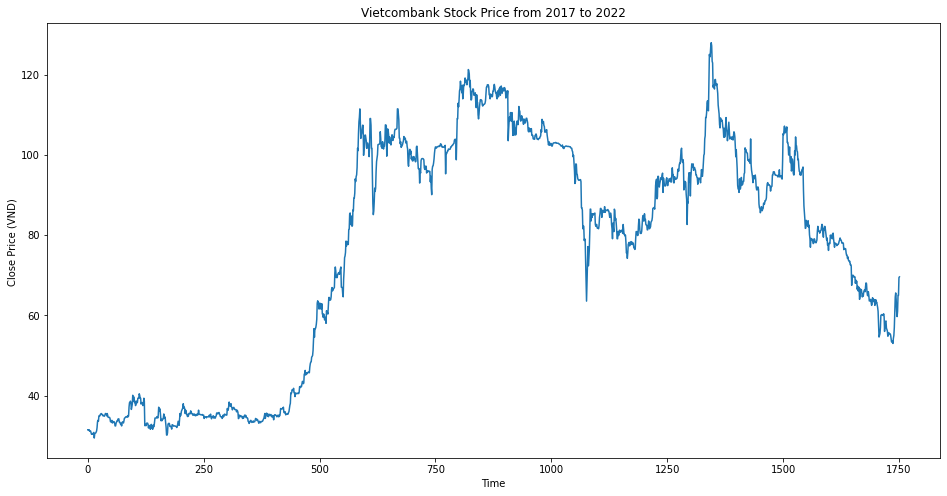

In [ ]:
#visualize the FPT stock price from 2017 to 2022 
plt.figure(figsize=(16,8))
plt.title('Vietcombank Stock Price from 2017 to 2022')
plt.xlabel('Time')
plt.ylabel('Close Price (VND) ')
plt.plot(df['Price'])
plt.show()

In [ ]:
#Select Variables
df = df.loc[:,["Date","Price"]]
df

,Date,Price
0,11/30/2015,31.476
1,12/1/2015,31.476
2,12/2/2015,31.329
3,12/3/2015,31.476
4,12/4/2015,31.109
...,...,...
1747,11/24/2022,61.000
1748,11/25/2022,65.000
1749,11/28/2022,65.000
1750,11/29/2022,69.400


In [ ]:

#Remaining variable
df = df.rename(columns = {'Price' : 'y'})
df = df.rename(columns = {'Date' : 'ds'})
df

,ds,y
0,11/30/2015,31.476
1,12/1/2015,31.476
2,12/2/2015,31.329
3,12/3/2015,31.476
4,12/4/2015,31.109
...,...,...
1747,11/24/2022,61.000
1748,11/25/2022,65.000
1749,11/28/2022,65.000
1750,11/29/2022,69.400


In [ ]:
#Set training and test set (Rate: 70% - 30%)
train_set = df.sample(frac=0.7, random_state=0)
test_set = df.drop(train_set.index)

In [ ]:
#Build Prophet model
p = Prophet(daily_seasonality=True)
p.fit(train_set)
Prediction = p.predict(pd.DataFrame({'ds':test_set['ds']}))
y_Actual = test_set['y']
y_Predicted = Prediction['yhat']
y_Predicted = y_Predicted.astype(int)
mean_absolute_error(y_Actual, y_Predicted)

3.3636064638783276

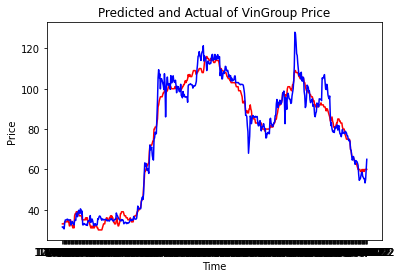

In [ ]:
plt.plot(test_set['ds'],y_Predicted,'r')
plt.plot(test_set['ds'],y_Actual,'b')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Predicted and Actual of VinGroup Price")
plt.show()

In [ ]:
#Using RMSE and MAPE to measure the accuracy of a model.
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
mape = mean_absolute_percentage_error(y_Actual, y_Predicted)
mse = mean_squared_error(y_Actual, y_Predicted)
rmse = np.sqrt(mse)
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.0f}")

MAPE: 4.62%
RMSE: 5


In [ ]:
m = Prophet()       
m.fit(df)
future = m.make_future_dataframe(30)                                 
forecast = m.predict(future)                                   

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#get prediction data
test_days = 30
prediction_set = forecast.yhat[-test_days:]
prediction_set

1752    61.038850
1753    60.980138
1754    60.371466
1755    60.268686
1756    60.626101
1757    60.535531
1758    60.239047
1759    60.187778
1760    59.994628
1761    59.262475
1762    59.049683
1763    59.312836
1764    59.145753
1765    58.792162
1766    58.704471
1767    58.496441
1768    57.771358
1769    57.587528
1770    57.901003
1771    57.804594
1772    57.540557
1773    57.559392
1774    57.472546
1775    56.880629
1776    56.838962
1777    57.300364
1778    57.354230
1779    57.239295
1780    57.402505
1781    57.451801
Name: yhat, dtype: float64

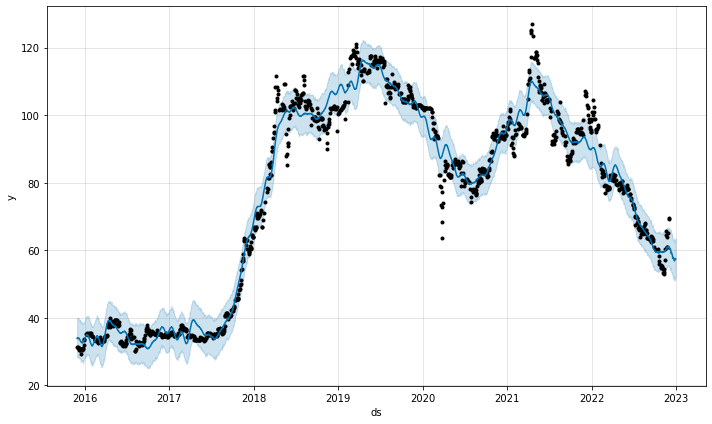

In [ ]:
#visualization forecast
p.plot(forecast);

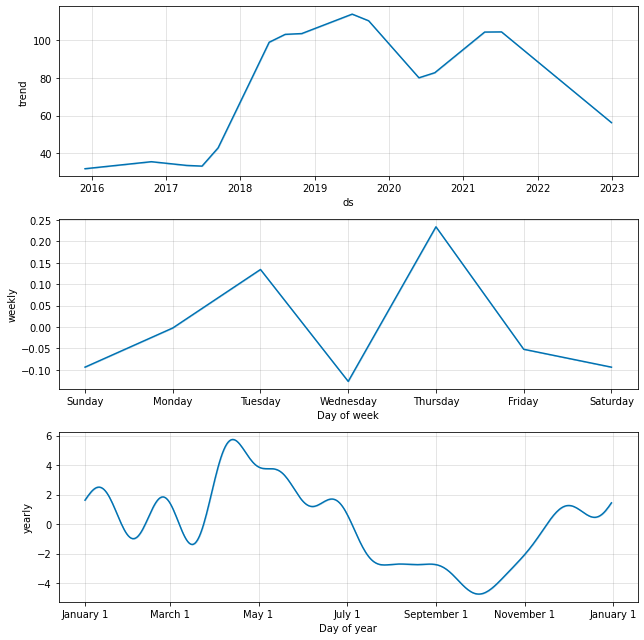

In [ ]:
p.plot_components(forecast);